딥러닝으로 데이터를 분석할 때, 우리는 많은 차원의 feature들과 맞이 하게 됩니다. 

딥러닝은 자동으로 feature를 골라내고 배울 수 있는 알고리즘이므로 그냥 컴퓨팅 파워를 믿고 모든feature들을 넣어 훈련시켜봅니다. 다행이 성능이 잘 나온다면 좋겠지만, 안나오면 이지러리 튜닝을 해봅니다. 그렇게 삽질을 하다 지칠때쯤.. 문뜩 이런 생각이 듭니다. 이거 잘되는 데이터 맞아?

이미지의 경우 2차원으로 만들어서 출력해보면 대충 눈으로 패턴을 확인해볼 수 있습니다.
근데 데이터가 이미지가 아니라면? 저 많은 feature들을 가진 데이터가 될성 싶은 데이터인지 확인해보고 싶어집니다. 

하지만 다시 삽질이 시작됩니다. 몇개씩 끊어서 scatter matrix도 그려보고 하다가 지치고..

이렇게 고차원의 feature들을 가진 데이터가 될성 싶은 데이터인지 확인해보는 방법으로 t-SNE를 쓸수 있습니다.

* https://lvdmaaten.github.io/tsne/

정말 고맙게도 고차원 feature를 2차원으로 만들어서 plot 해볼수 있는 알고리즘이죠. 실제 시간이 많이 걸리는 훈련 전 탐험적 데이터 분석 단계에서 적용해보면 들인 시간에 비해 정말 효율적인 알고리즘 입니다.

여기서는 mnist 데이터 셋에 대해 sklearn에서 제공하는 t-SNE를 돌려서 시각화 해보도록 하겠습니다.

In [1]:
import keras
from keras.datasets import mnist
from sklearn import preprocessing

import numpy as np

# keras 패키지를 이용해서 mnist 데이터셋을 다운로드합니다.
(train_xs, train_ys), (test_xs, test_ys) = mnist.load_data()
dim_x = train_xs.shape[1] * train_xs.shape[2]
dim_y = 10

# 2차원 이미지 데이터를 1차원으로 바꿔줍니다.
train_xs = train_xs.reshape(train_xs.shape[0], dim_x).astype(np.float32)

# 분석하기 좋게 MinMax 값으로 데이터를 리 스케일링 합니다.
scaler = preprocessing.MinMaxScaler().fit(train_xs)
train_xs = scaler.transform(train_xs)
print(train_xs.shape)
print(train_ys.shape)

Using TensorFlow backend.


(60000, 784)
(60000,)


In [2]:
# 데이터 전체를 t-SNE 에 돌리면 시간이 많이 걸리니 대략 1000개 정도를 랜덤으로 선택합니다.
ridx = np.random.randint(train_xs.shape[0], size=1000)
np_train_xs = train_xs[ridx, :]
np_train_ys = train_ys[ridx]
print(np_train_xs.shape)
print(np_train_ys.shape)

(1000, 784)
(1000,)


In [3]:
import sklearn
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

def draw_scatter(x, n_class, colors):
    sns.palplot(sns.color_palette("hls", n_class))
    palette = np.array(sns.color_palette("hls", n_class))
    
    f = plt.figure(figsize=(14, 14))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    plt.show()

In [4]:
tsne_train_xs = TSNE(random_state=42).fit_transform(np_train_xs)

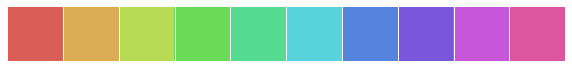

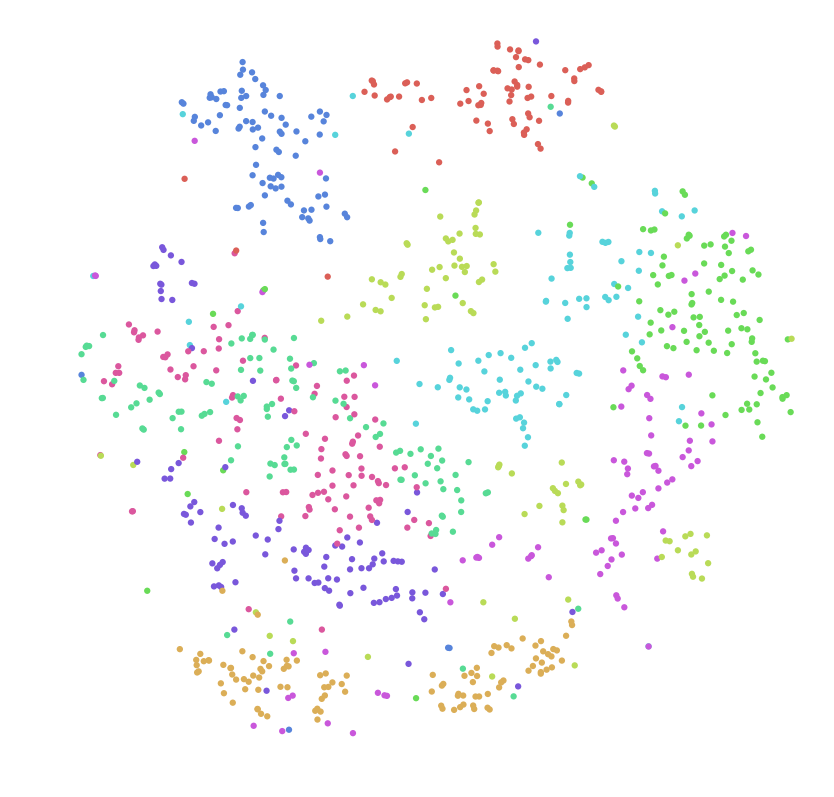

In [5]:
draw_scatter(tsne_train_xs, dim_y, np_train_ys)

상위 바의 색깔은 데이터의 라벨을 나타냅니다. 2차원으로 맵핑된 plot을 보면 색깔이 많이 겹치지 않는 것으로 보아 이 데이터 셋은 될성 싶은 데이터 인 것이 확인되었습니다. ^^